In [1]:
from src import stock,blsh,support_resistence

In [2]:
symbol = 'BEL.NS'        #use yahoo symbols
start_date = '2018-12-01'    #start dates for historical data
end_date = '2021-05-17'

In [3]:
buy = stock.Stock(symbol, start_date, end_date)

In [4]:
buy.load_data()

In [5]:
buy.stock_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-03,86.449997,82.400002,84.150002,85.199997,10241635.0,78.118195
2018-12-04,86.400002,83.500000,85.000000,83.900002,4879265.0,76.926247
2018-12-05,83.900002,81.000000,83.050003,82.699997,5501276.0,75.826012
2018-12-06,84.000000,81.500000,81.550003,81.800003,7204271.0,75.000809
2018-12-07,82.550003,80.000000,82.300003,80.099998,7272768.0,73.442116
...,...,...,...,...,...,...
2021-05-10,145.899994,138.649994,139.000000,144.750000,22373168.0,144.750000
2021-05-11,149.750000,141.449997,142.750000,148.550003,23494231.0,148.550003
2021-05-12,155.600006,145.800003,152.449997,146.850006,45341627.0,146.850006


In [6]:
bhel = support_resistence.supportAndResistence(buy)

In [7]:
bhel.generateSignal()

In [8]:
bhel.signal

,price,sup_tolerance,res_tolerance,sup_count,res_count,sup,res,positions,signal,Positions
Date,,,,,,,,,,
2018-12-03,78.118195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-04,76.926247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-05,75.826012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-06,75.000809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-07,73.442116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-05-10,144.750000,126.470001,140.180000,NaN,1.0,121.900002,144.750000,NaN,1.0,0.0
2021-05-11,148.550003,127.230002,143.220003,NaN,2.0,121.900002,148.550003,NaN,1.0,0.0
2021-05-12,146.850006,127.230002,143.220003,NaN,3.0,121.900002,148.550003,NaN,1.0,0.0


In [9]:
bhel.Call()

'Hold'

In [10]:
bhel.mostRecentCall()

Given most recent call on: 2021-05-03 00:00:00


'Buy'

In [11]:
bhel.stock_data.loc['2021-05-05 00:00:00','Adj Close']

137.85000610351562

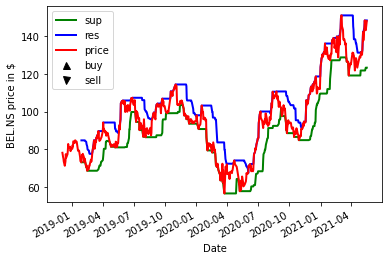

In [12]:
stock_signal = bhel.signal

import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel=symbol +' price in $')
stock_signal['sup'].plot(ax=ax1, color='g', lw=2.)
stock_signal['res'].plot(ax=ax1, color='b', lw=2.)
stock_signal['price'].plot(ax=ax1, color='r', lw=2.)
ax1.plot(stock_signal.loc[stock_signal.positions == 1.0].index,
      stock_signal.price[stock_signal.positions == 1.0],
      '^', markersize=7, color='k',label='buy')
ax1.plot(stock_signal.loc[stock_signal.positions == -1.0].index,
      stock_signal.price[stock_signal.positions == -1.0],
      'v', markersize=7, color='k',label='sell')
plt.legend()
plt.show()

In [13]:
bhel.stock_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-03,86.449997,82.400002,84.150002,85.199997,10241635.0,78.118195
2018-12-04,86.400002,83.500000,85.000000,83.900002,4879265.0,76.926247
2018-12-05,83.900002,81.000000,83.050003,82.699997,5501276.0,75.826012
2018-12-06,84.000000,81.500000,81.550003,81.800003,7204271.0,75.000809
2018-12-07,82.550003,80.000000,82.300003,80.099998,7272768.0,73.442116
...,...,...,...,...,...,...
2021-05-10,145.899994,138.649994,139.000000,144.750000,22373168.0,144.750000
2021-05-11,149.750000,141.449997,142.750000,148.550003,23494231.0,148.550003
2021-05-12,155.600006,145.800003,152.449997,146.850006,45341627.0,146.850006


In [14]:
bhel.SMA()

In [15]:
bhel.EMA()

In [16]:
bhel.APO()

In [17]:
bhel.returns(method='LOG')

In [18]:
bhel.returns()

In [19]:
bhel.stock_data

,High,Low,Open,Close,Volume,Adj Close,SMA20,EMA20,APO F10S40,log_returns,Simple_return
Date,,,,,,,,,,,
2018-12-03,86.449997,82.400002,84.150002,85.199997,10241635.0,78.118195,78.118195,78.118195,0.000000,NaN,NaN
2018-12-04,86.400002,83.500000,85.000000,83.900002,4879265.0,76.926247,77.522221,78.004676,-0.158574,-0.015376,-0.015258
2018-12-05,83.900002,81.000000,83.050003,82.699997,5501276.0,75.826012,76.956818,77.797184,-0.426954,-0.014406,-0.014302
2018-12-06,84.000000,81.500000,81.550003,81.800003,7204271.0,75.000809,76.467815,77.530862,-0.741822,-0.010942,-0.010883
2018-12-07,82.550003,80.000000,82.300003,80.099998,7272768.0,73.442116,75.862675,77.141458,-1.187661,-0.021001,-0.020782
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-10,145.899994,138.649994,139.000000,144.750000,22373168.0,144.750000,130.472501,133.005871,4.378743,0.048479,0.049674
2021-05-11,149.750000,141.449997,142.750000,148.550003,23494231.0,148.550003,131.405001,134.486265,5.833807,0.025914,0.026252
2021-05-12,155.600006,145.800003,152.449997,146.850006,45341627.0,146.850006,132.652501,135.663764,6.688336,-0.011510,-0.011444


,Return
Date,
2019-05-20,0.079935
2019-11-05,-0.057741
2020-01-31,-0.100248
2020-12-21,-0.076701


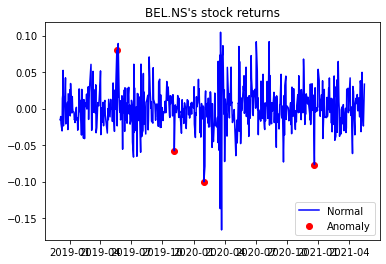

In [20]:
buy.findOutliers()

In [21]:
start_date = '2018-12-01'    
end_date = '2021-05-17'

In [22]:
stocks = ['TWTR']
indicators = ['Bollinger Bands', 'MACD', 'RSI']

In [25]:
from src.interactiveta import interativeta

In [26]:
inte = interativeta(stocks,indicators)

In [27]:
inte.run()

In [28]:
display(inte.ui,inte.out)

Output(outputs=({'output_type': 'display_data', 'data': {'application/vnd.plotly.v1+json': {'config': {'linkTe…